In [1]:
#Importing relevant libraries
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import distance
import seaborn as sns


In [2]:
#Initiation-User defined values


#User inputs
noofhouses=5000                     #Number of houses to generate
sizeofframe=500                     #Length and width of field of view/frame. unit: Km/mile
cluster_centers = [(150,150),(300,300),(400,100)]#[(sizeofframe/2, sizeofframe/2)]  #Center(s) of data swath(s)
cluster_std = [(sizeofframe/8),(sizeofframe/4),(sizeofframe/16)]#[sizeofframe/8]    #Standard deviation of the cluster/swath(s)
nearestdistance=10


In [3]:

#Functions

#Random smudges of data representing Houses
def House_generator(noofhouses,sizeofframe,cluster_centers,cluster_std):
    X, y = make_blobs(n_samples=noofhouses, cluster_std=cluster_std, centers=cluster_centers, n_features=2, random_state=1)
    Houses=np.zeros(X.shape)

    for row in range(0,X.shape[0],1):
        if X[row,0]<(sizeofframe-10) and X[row,0]>10:
            if X[row,1]<(sizeofframe-10) and X[row,1]>10:
                Houses[row,0]=X[row,0]
                Houses[row,1]=X[row,1]
    
    return Houses

In [4]:
#Generating dispersion of Restaurants and Hospitals
def Servicecenter_generator(noofhouses,sizeofframe,qty_S= 10*math.ceil(0.0007*(noofhouses*3.69)**1.0375),radius=20):
    rangeX = (10, sizeofframe-10)
    rangeY = (10, sizeofframe-10)
    #qty_S = 10*math.ceil(0.0007*(noofhouses*3.69)**1.0375) based on quantitative data relating popualtion and restaurant numbers

    # Generate a set of all points within radius of the origin, to be used as offsets later
    deltas = set()
    for x in range(-radius, radius+1):
        for y in range(-radius, radius+1):
            if x*x + y*y <= radius*radius:
                deltas.add((x,y))
    
    randPoints = []
    excluded = set()
    i = 0
    while i<qty_S:
        x = random.randrange(*rangeX)
        y = random.randrange(*rangeY)
        if (x,y) in excluded: continue
        randPoints.append((x,y))
        i += 1
        excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
    
    Servicecenter=np.array(randPoints)
    return Servicecenter

In [5]:
#Function to get nearest neighbor distances
def dist(Case,Ristoranti):
    distancelist=[]
    for casa in Case:
        for ristorante in Ristoranti:
            dist=distance.euclidean(casa,ristorante)
            distancelist.append(dist)
    return distancelist

In [6]:
#Function to get number of restaurents closer than nearestdistance
def numberofservicesnear(Case,Ristoranti,nearestdistance=10):
    distancelist=[]
    for casa in Case:
        c=0
        for ristorante in Ristoranti:
            dist=distance.euclidean(casa,ristorante)
            if dist<nearestdistance:
                c=c+1
        if c>0:
            distancelist.append(c)
    return distancelist

def histogramer(neighbors,title,xaxis,houses=noofhouses):
    bins=np.linspace(math.floor(neighbors.min()),math.ceil(neighbors.max()),100)
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel('Number frequency')
    ax.hist(neighbors, bins)
    return plt.show()

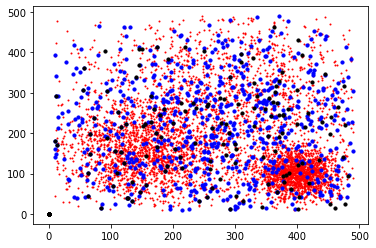

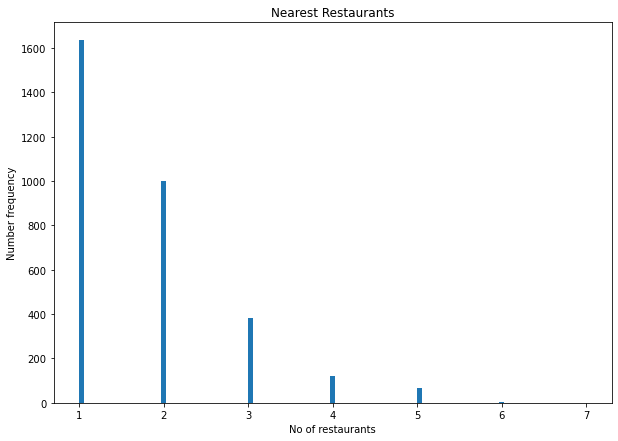

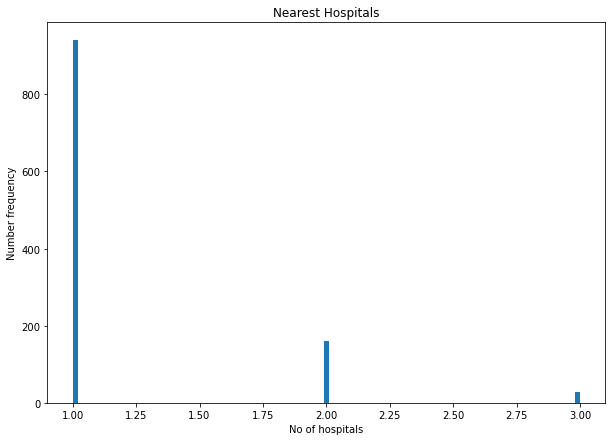

In [8]:
#Body
# No of restaurants got from no of homes. 

Houses=np.array(House_generator(noofhouses,sizeofframe,cluster_centers,cluster_std))
Restaurants=House_generator(50*math.ceil(0.0007*(noofhouses*3.69)**1.0375),sizeofframe,cluster_centers,sizeofframe/4)
Hospitals=House_generator(10*math.ceil(0.0007*(noofhouses*3.69)**1.0375),sizeofframe,cluster_centers,sizeofframe/4)
#Restaurants=Servicecenter_generator(noofhouses,sizeofframe)
#Hospitals=Servicecenter_generator(noofhouses,sizeofframe,5*math.ceil(0.0007*(noofhouses*3.69)**1.0375),5)

plt.scatter(Houses[:, 0], Houses[:, 1], color="red", s=1, label="Houses")
plt.scatter(Restaurants[:, 0], Restaurants[:, 1], color="blue", s=10, label="Restaurants")
plt.scatter(Hospitals[:, 0], Hospitals[:, 1], color="black", s=10, label="Hospital")


#Yummydistances=np.array(dist(Houses,Restaurants))
#Healthydistances=np.array(dist(Houses,Hospitals))
#histogramer(Yummydistances,"Distance of a Restaurant from a home","Distance in km")
#histogramer(Healthydistances, Distance of a Hospital from a home","Distance in km")


Yummyneighbors=np.array(numberofservicesnear(Houses,Restaurants))
Yummyneighbors=Yummyneighbors[Yummyneighbors!=Yummyneighbors.max()]
Healthyneighbors=np.array(numberofservicesnear(Houses,Hospitals))
Healthyneighbors=Healthyneighbors[Healthyneighbors!= Healthyneighbors.max()]
histogramer(Yummyneighbors,"Nearest Restaurants", "No of restaurants")
histogramer(Healthyneighbors,"Nearest Hospitals","No of hospitals")